# Project Template

Group Number = 7  

Group Members: 4

Names: Ali Alhajji, Abdulaziz Alhur, Mohammed Alsultan, Ahmed Aljaafar 

Student IDs: 202264620, 202037460, 202221800, 202036980


##  1. Discovery:

The dataset (gym_members_exercise_tracking.csv) contains information about 973 gym members and their workout metrics. It includes 15 columns, combining demographic, physical, and performance-related data.

Columns and Their Details
1.	Demographic Information:

    o	Age: Age of gym members (integer).
    o	Gender: Gender of gym members (categorical: Male/Female).
3.	Physical Attributes:

    o	Weight (kg): Weight of the individuals in kilograms (float).
    o	Height (m): Height of individuals in meters (float).
    o	Fat_Percentage: Body fat percentage (float).
4.	Workout Metrics:

    o	Max_BPM: Maximum heart rate during a workout session (integer).
    o	Avg_BPM: Average heart rate during a workout session (integer).
    o	Resting_BPM: Resting heart rate (integer).
    o	Session_Duration (hours): Duration of a workout session in hours (float).
    o	Calories_Burned: Calories burned during the session (float).

•  Outlier Detection and Removal

•	Outliers were identified in all numeric columns using the interquartile range (IQR) method: 

    o	Q1: 25th percentile.
    o	Q3: 75th percentile.
    o	IQR: Q3 - Q1.
    o	Outliers were defined as values outside Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.
•	Outliers were removed, reducing the dataset from 973 rows to 931 rows.

•  Missing Data Handling

•	Missing values were previously checked and imputed (although there is no indication of missing data in this final dataset).

•  Final Dataset Structure

•	The display(df), df.info(), and df.describe() commands confirm: 
    o	931 rows remain after cleaning.
    o	All columns are complete, with no missing values.
    o	The dataset includes numeric and categorical features.

With a clean dataset ready, you can now perform:
1.	Exploratory Data Analysis (EDA):

    o	Analyze correlations between variables (e.g., Calories_Burned vs. Session_Duration).
    o	Investigate trends by Workout_Type or gender.
2.	Visualization:

    o	Create histograms, boxplots, and scatter plots to visualize the distribution and relationships of variables.
3.	Modeling:

    o	Predict outcomes like calories burned or session duration based on other features.


This section of the notebook focuses on data transformation, correlation analysis, and dimensionality reduction using Principal Component Analysis (PCA). Here's an overview of the steps and techniques applied:
________________________________________
Key Steps in the Code
1.	Mapping Categorical Values to Numeric

    o	The Gender and Workout_Type columns are mapped to numeric values for further analysis: 
    o	Gender: Male → 0, Female → 1.
    o	Workout_Type: Each workout type is mapped to a specific numeric value.
2.	Correlation Analysis

    o	Pearson correlation is computed using df.corr(method='pearson'): 
    o	Identifies relationships between numeric variables.
    o	Displays a correlation matrix for further exploration.
3.	Principal Component Analysis (PCA)

    o	Dimensionality Reduction: 
    o	Non-object columns (numeric features) are selected for PCA.
    o	Session_Duration (hours) is excluded as a target variable to focus on predictors.
    o	PCA is performed using sklearn.decomposition.PCA: 
    o	The number of components is set to 17 (one per numeric feature).
    o	The transformed data is stored in principalComponents, and the first two principal components (pca1, pca2) are added back to the DataFrame.
-Variance Explained: 
    o	The variance explained by each PCA component is printed to understand the contribution of each principal component to the dataset's total variability.
5.	PCA Coefficients

    o	The coefficients of the first principal component (pca1_coeff) are extracted to identify the most influential features.
    o	Features are sorted by their contribution to the first principal component, providing insight into the most significant variables.


For the visualization,

Visualize correlations using heatmaps.
Plot the variance explained by each PCA component (scree plot).
Scatter plot of pca1 vs. pca2 to visualize clusters or patterns.



In [6]:
#Import DataSet

import pandas as pd
df = pd.read_csv('Data/gym_members_exercise_tracking.csv', delimiter =',')
display(df.head())
display(df.info())
display(df.describe())
print(df.describe())
display(df['Workout_Type'].unique())

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

None

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

## 2. Data Preparation:


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#data cleaning
# removing outliers
for a in df.select_dtypes(exclude='object').columns:
    Q1 = df[a].quantile(0.25)
    Q3 = df[a].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[a] < (Q1 - 1.5 * IQR)) | (df[a] > (Q3 + 1.5 * IQR)))]
# print("\nOutliers Detected:")
# display(df)
# display(df.info())
# display(df.describe())


#data normalization
# numerical data ~~~
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
minmaxScaler = MinMaxScaler()
standardScaler = StandardScaler()



# # min max scaler method
# for num in df.select_dtypes(exclude='object').columns:
#     minmaxScaler.fit(df[['num']])
#     df['num'] = minmaxScaler.transform(df[['num']])
minmaxScaler.fit(df[['Age']])
df['Age'] = minmaxScaler.transform(df[['Age']])

# standard method
for num in df.select_dtypes(exclude='object').drop(['Age','Workout_Frequency (days/week)','Experience_Level'],axis=1).columns:
    standardScaler.fit(df[[num]])
    df[num]=standardScaler.transform(df[[num]])

display(df)

Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  \
0    0.926829    Male     0.832920   -0.103497  0.008689  0.948726   
1    0.682927  Female     0.145693   -1.504463 -0.078296  0.528990   
2    0.341463  Female    -0.203049   -0.492654 -1.122118 -1.499733   
3    0.170732    Male    -0.967204   -0.181328  0.878541  1.438418   
4    0.487805    Male    -1.331332    0.519155  0.704570  1.018682   
..        ...     ...          ...         ...       ...       ...   
968  0.146341    Male     0.771377    0.129998  0.617585  1.018682   
969  0.170732    Male    -0.279977   -0.881811  0.356630  1.578330   
970  1.000000  Female    -0.597948    0.285661  1.226481 -1.639645   
971  0.341463    Male     2.786900    0.830481  1.574422  0.179211   
972  0.682927    Male     0.853434   -0.726148 -1.209103  0.179211   

     Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  \
0      -0.295231                  1.282767         1.577783         Yoga   
1       0.520780                  0.134331        -0.058795         HIIT   
2      -1.111242                 -0.425164        -0.842829       Cardio   
3      -0.839238                 -1.956413        -1.394698     Strength   
4       0.792784                 -1.809178        -1.303355     Strength   
..           ...                       ...              ...          ...   
968     0.656782                  0.929402         1.771888     Strength   
969    -0.839238                  0.369907         1.376065     Strength   
970    -1.247244                  1.371109         0.116281       Cardio   
971    -0.023227                 -0.454611        -0.058795         HIIT   
972     0.520780                 -1.485259        -1.356639     Strength   

     Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
0         -2.013600               1.479839                              4   
1          1.407550              -0.852191                              4   
2          1.327241              -0.519044                              4   
3          0.588401              -0.852191                              3   
4          0.652648               0.313824                              3   
..              ...                    ...                            ...   
968       -2.431205               1.479839                              4   
969       -0.021945               0.646971                              2   
970       -1.017772               0.147250                              5   
971        0.492031              -0.852191                              3   
972        0.588401               1.479839                              2   

     Experience_Level       BMI  
0                   3  1.022724  
1                   2  1.332428  
2                   2  0.078125  
3                   1 -1.005841  
4                   1 -1.697515  
..                ...       ...  
968                 3  0.776680  
969                 1  0.246742  
970                 3 -0.818298  
971                 2  2.320041  
972                 1  1.569868  

[931 rows x 15 columns]

## 3. Model Planning:


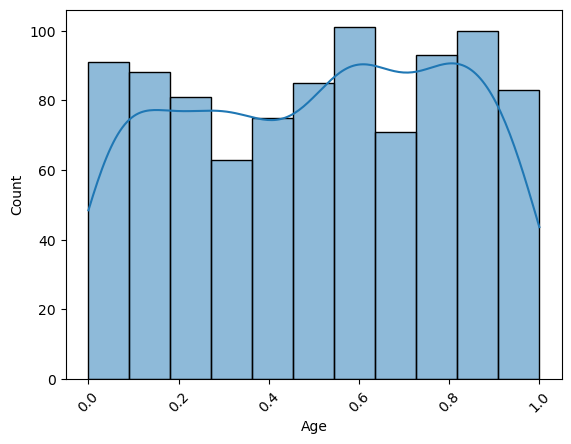

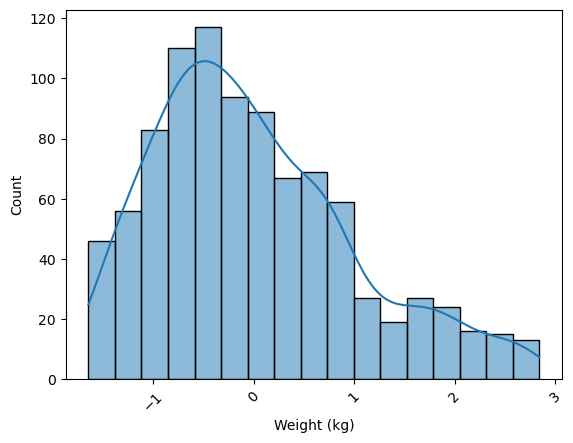

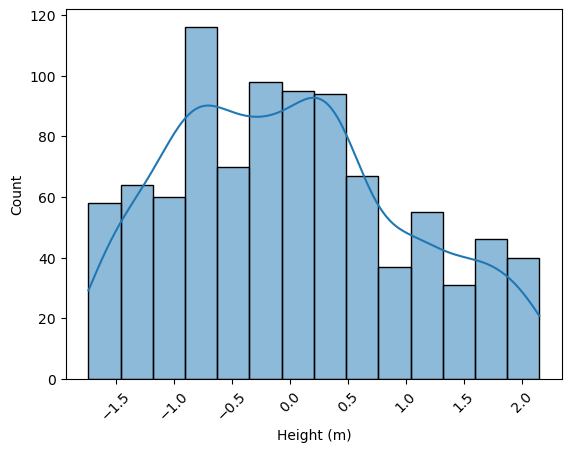

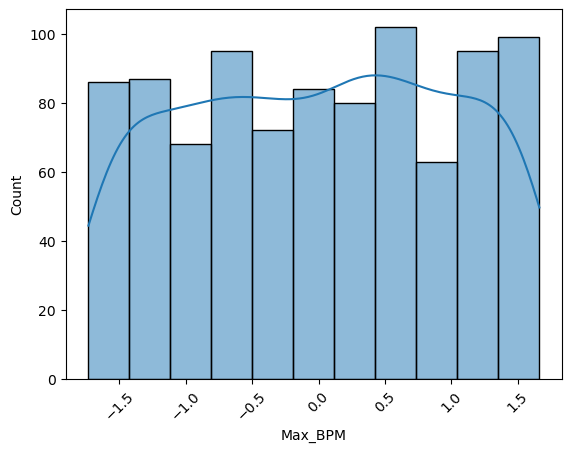

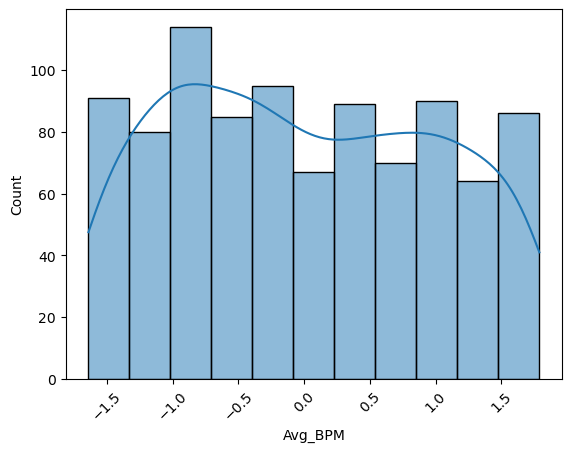

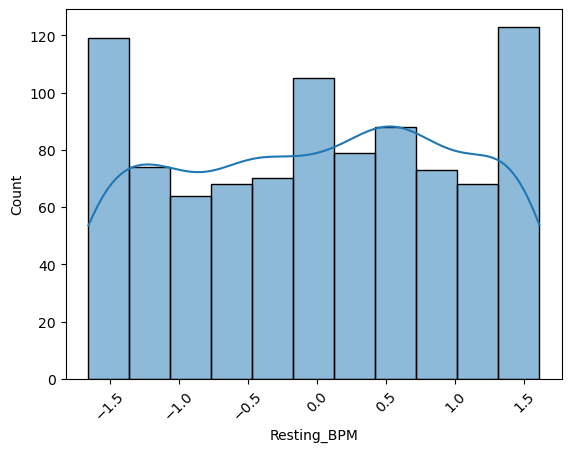

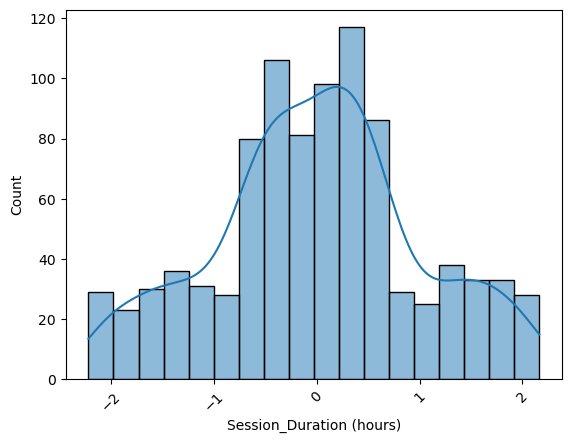

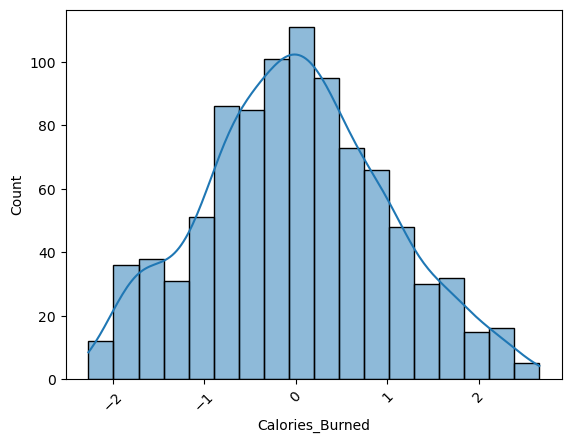

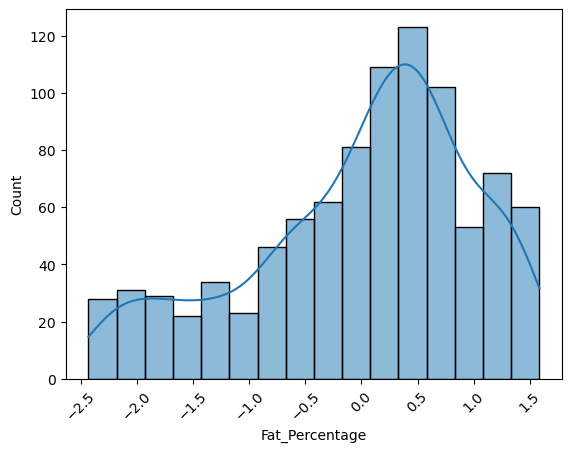

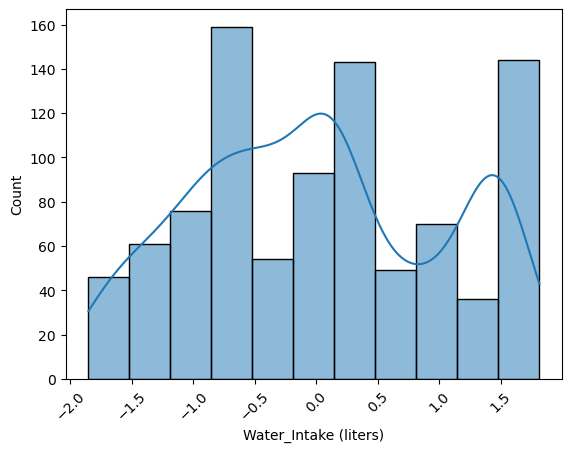

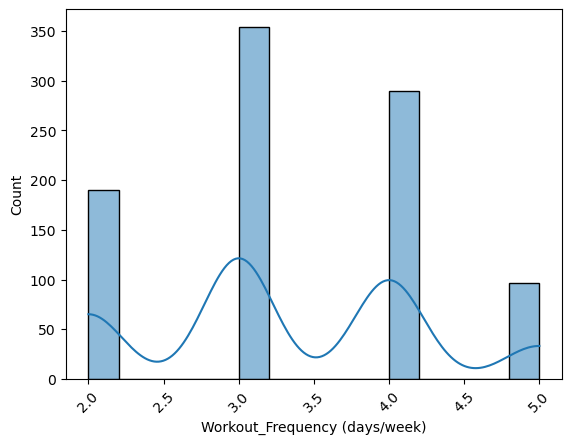

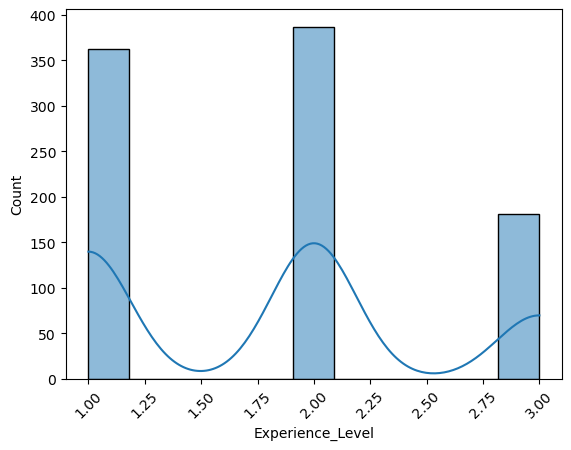

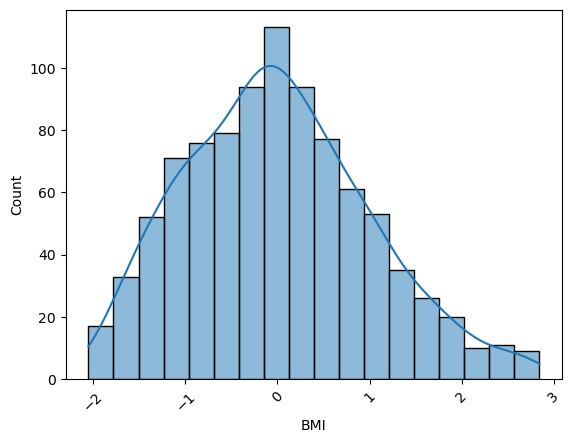

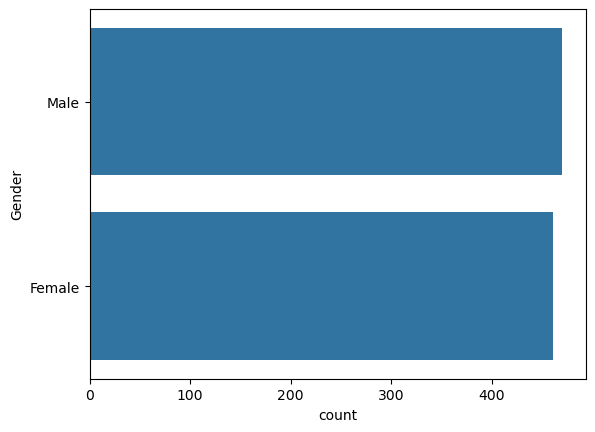

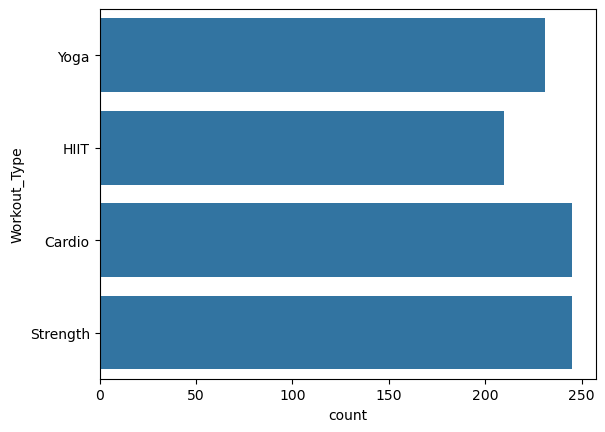

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ii. Make univariate graphs (i.e., graphs based on a single variable). 
# Identify numeric columns
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.histplot(x=c,kde=True,data=df);
    plt.xticks(rotation=45)
    plt.show()

obj_columns = df.select_dtypes('object').columns
for c in obj_columns:
    plt.figure()
    # sns.histplot(y=c,data=df);
    sns.countplot(y=c,data=df);
    plt.show()



<Figure size 1200x1000 with 0 Axes>

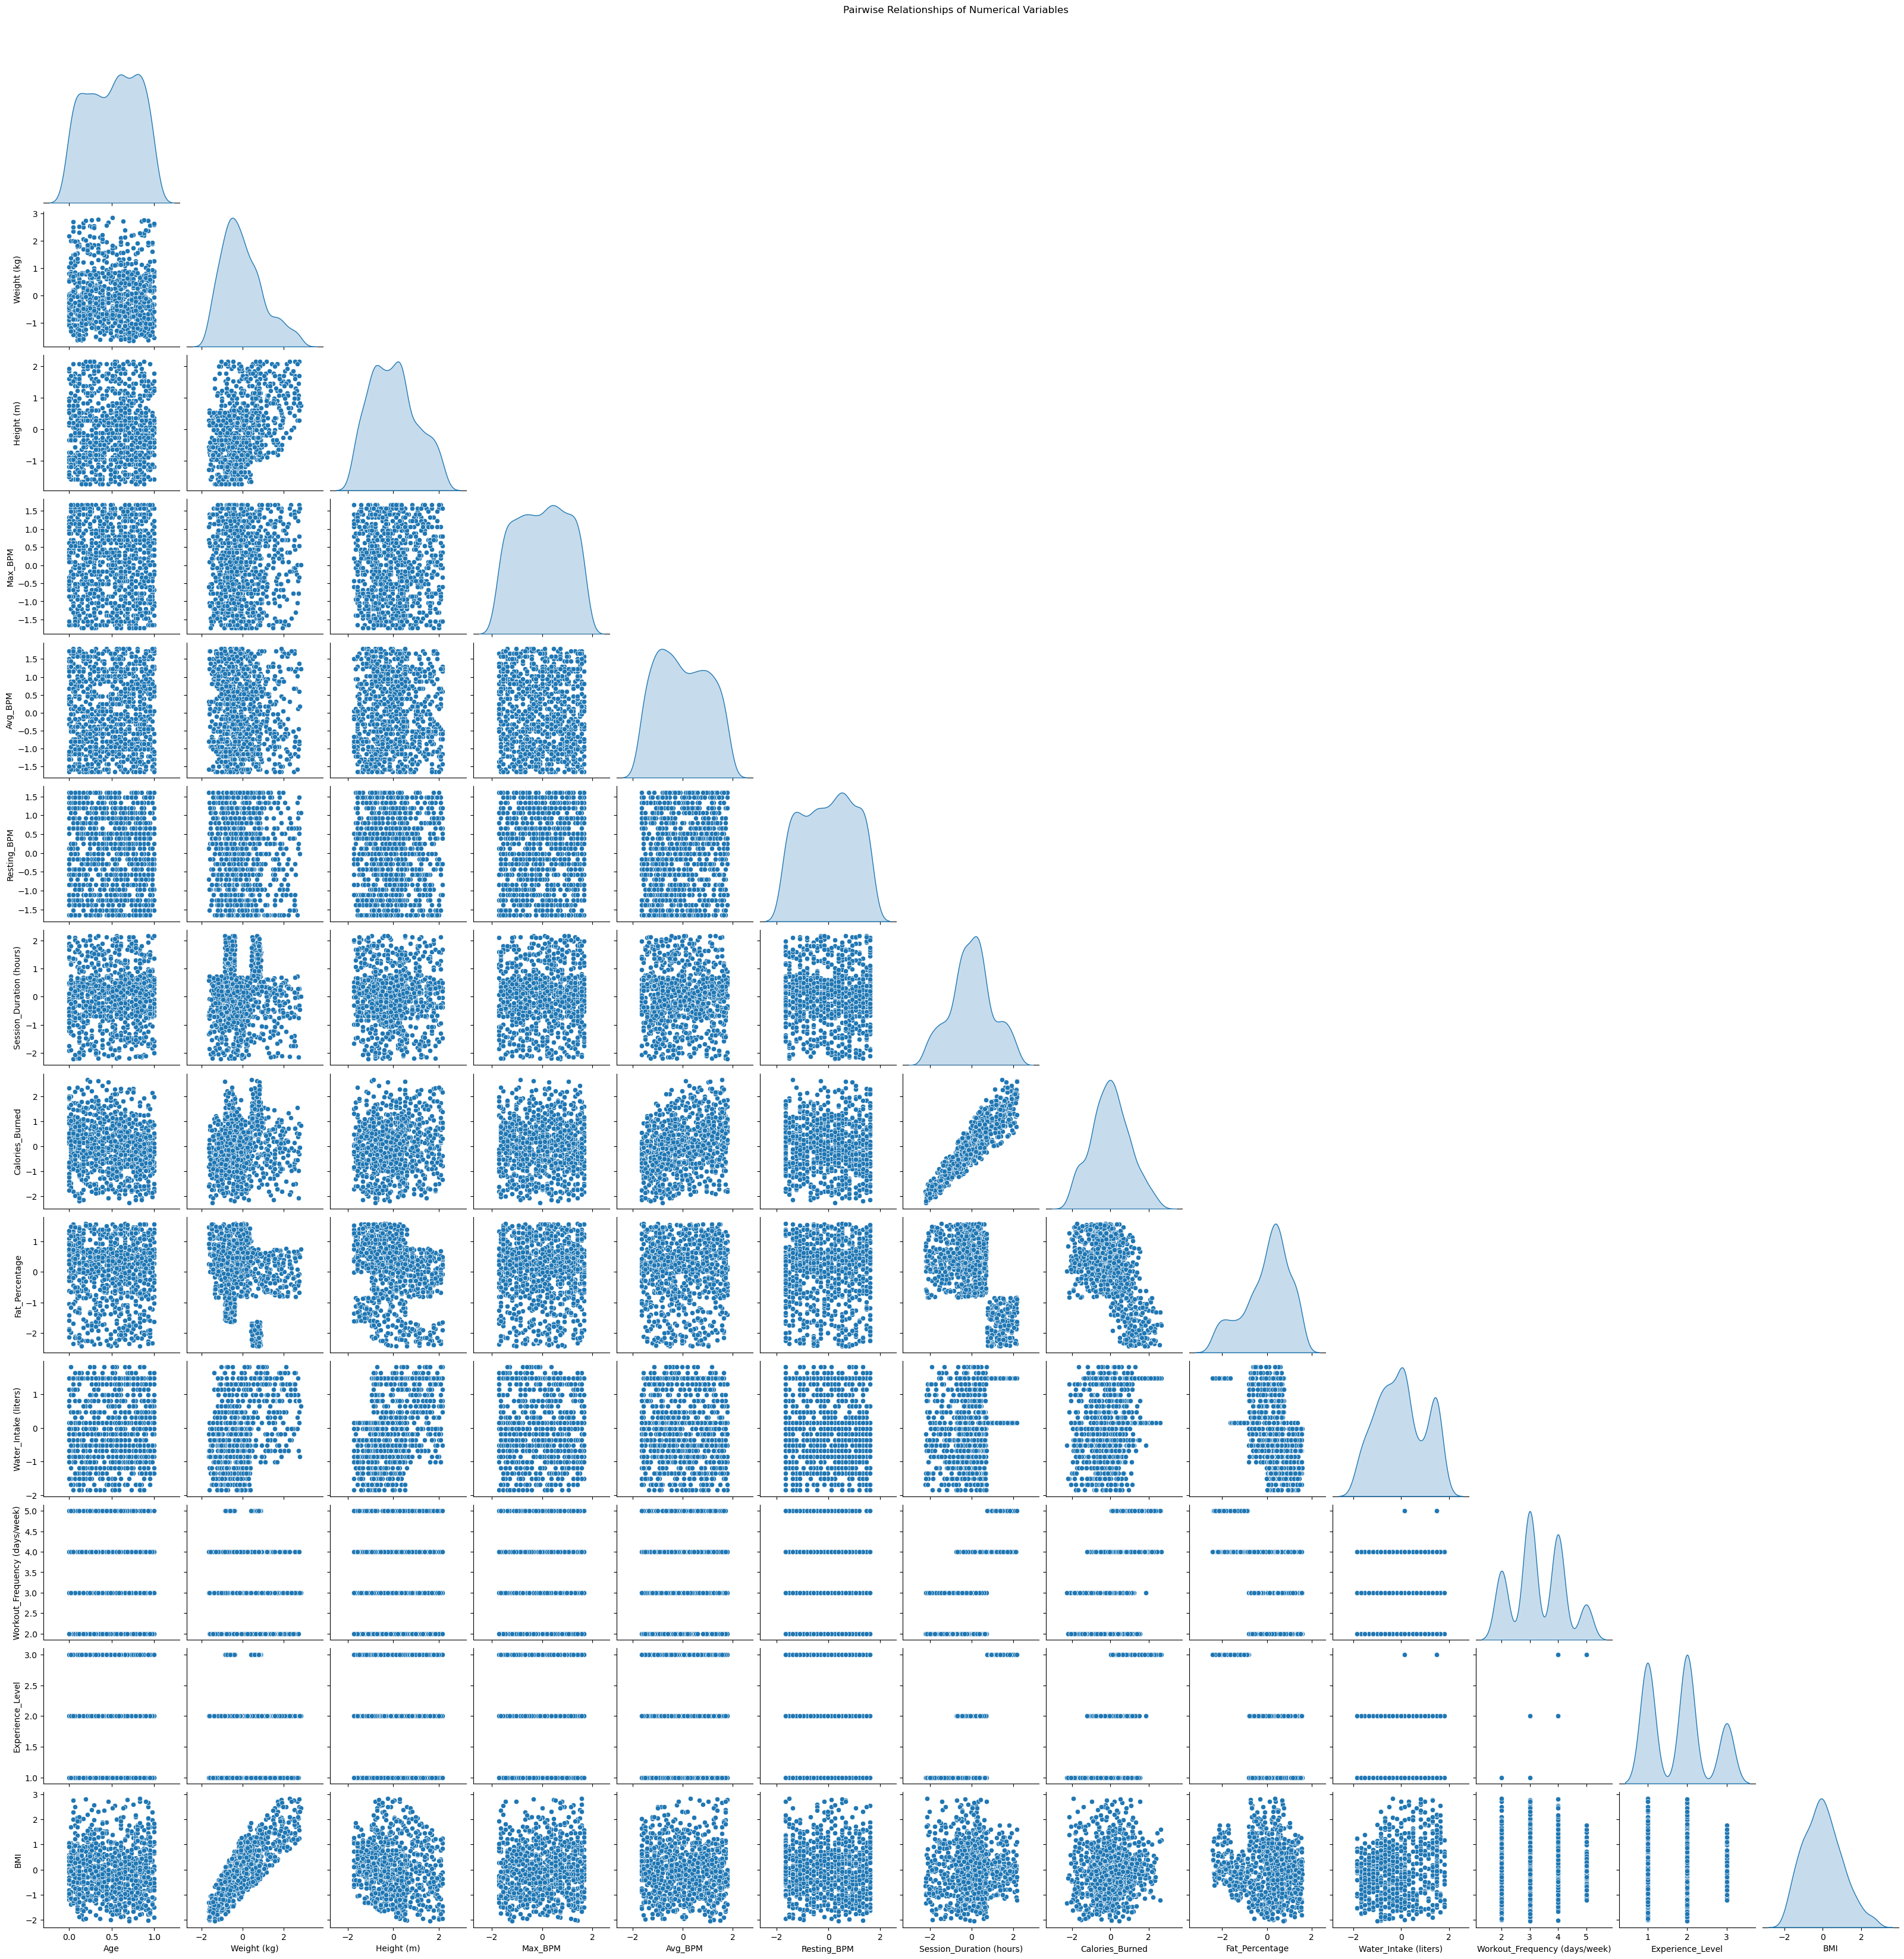

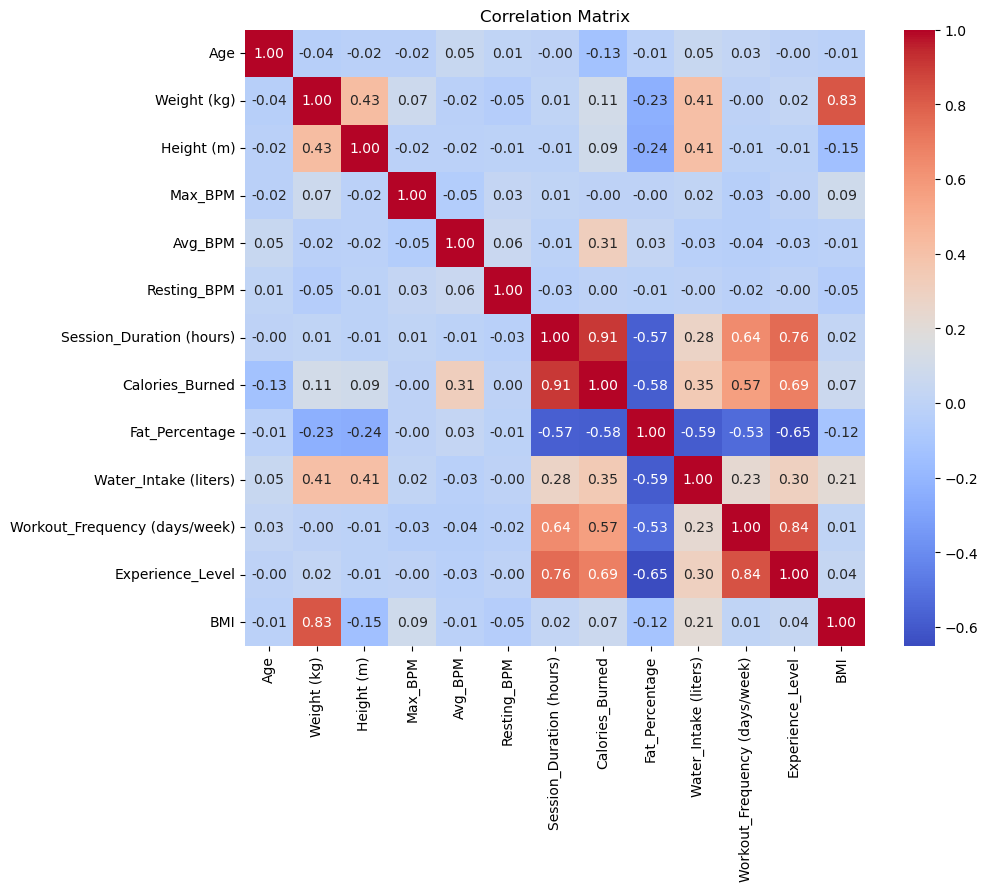

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


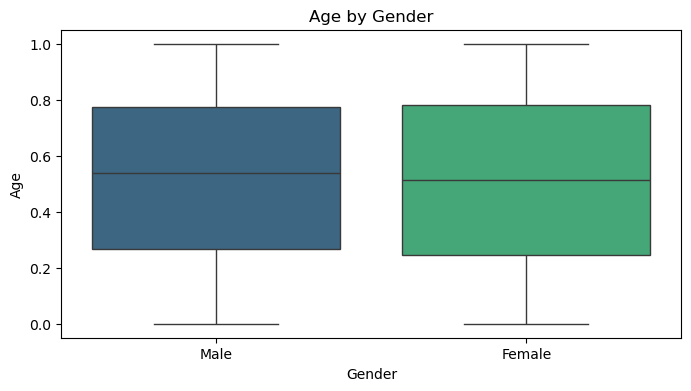

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


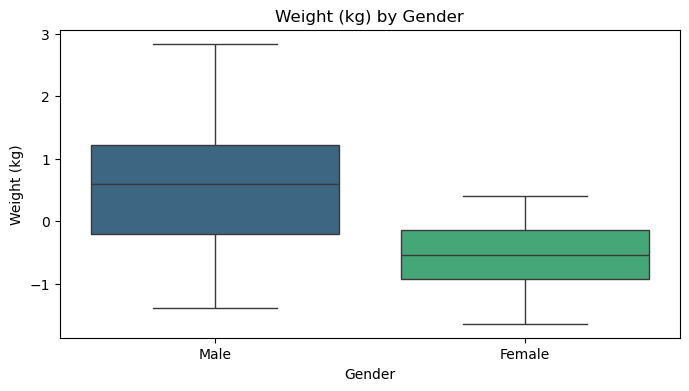

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


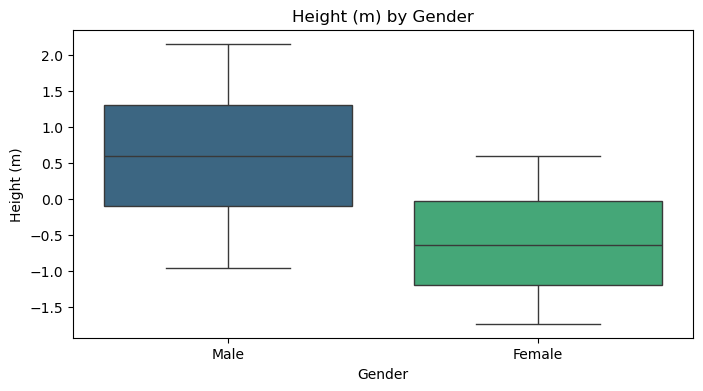

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


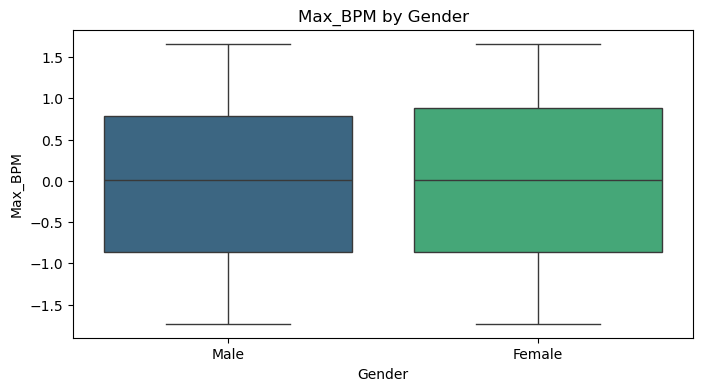

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


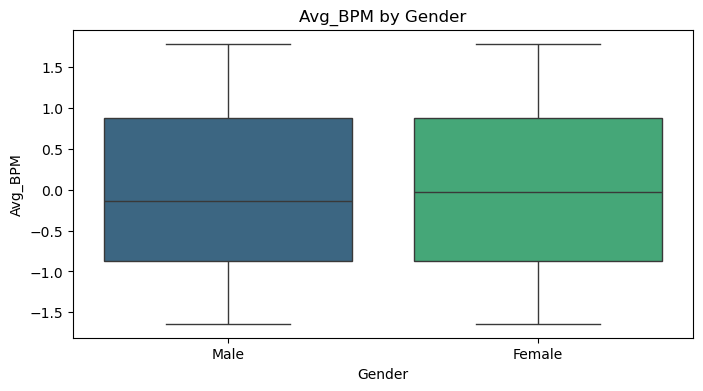

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


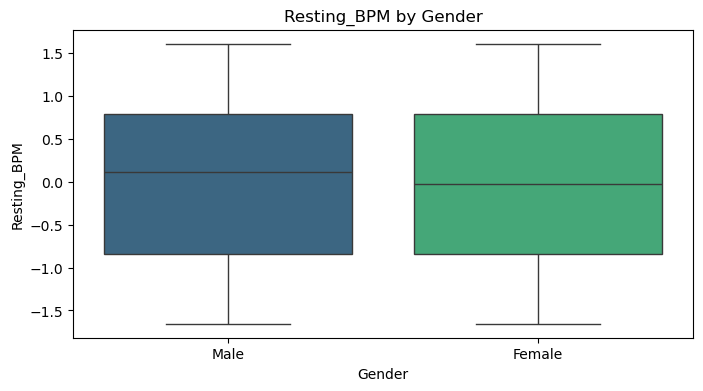

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


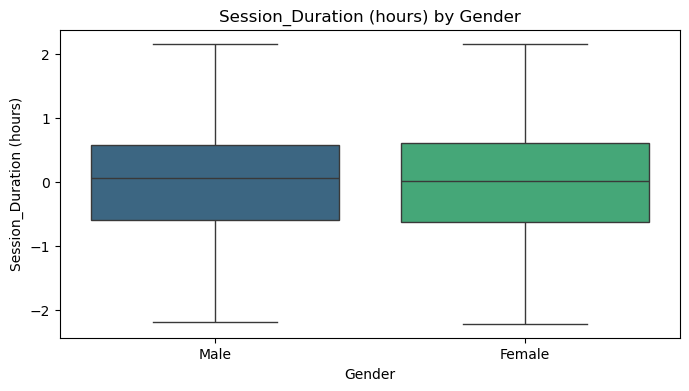

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


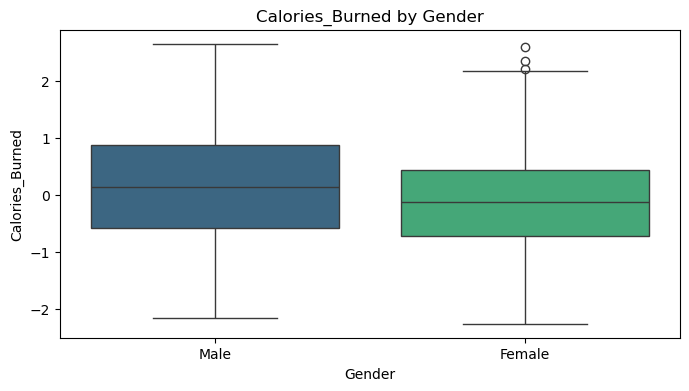

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


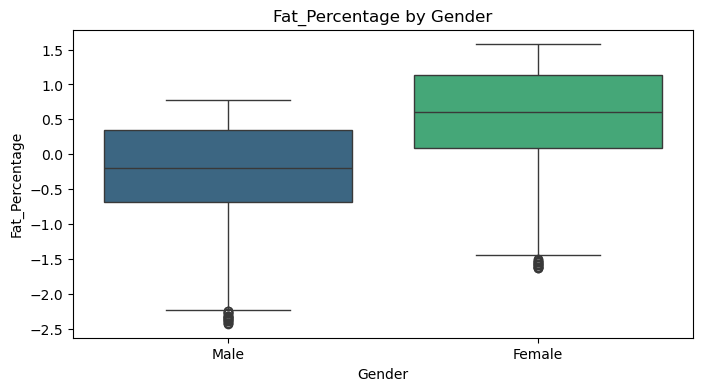

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


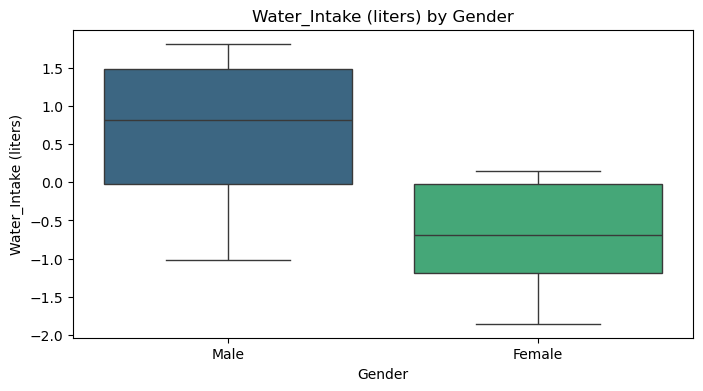

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


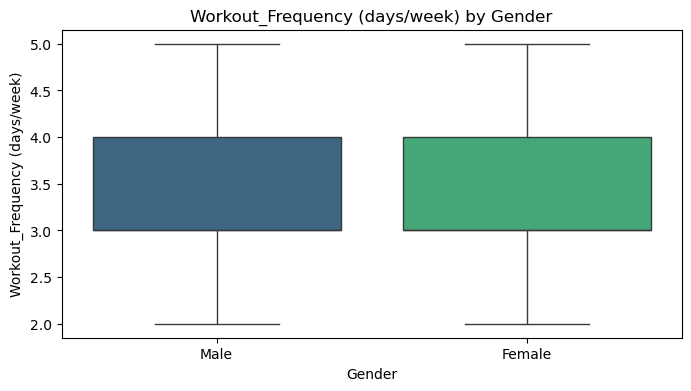

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


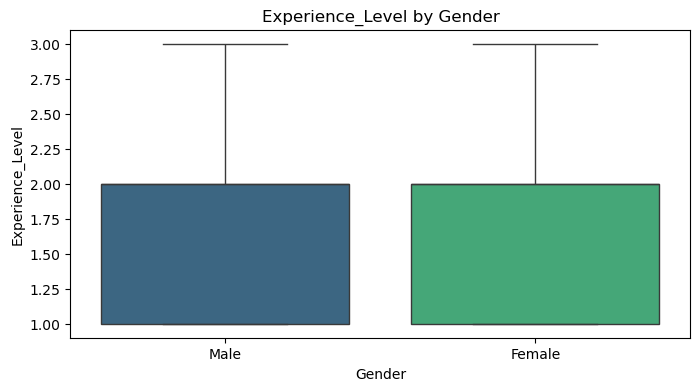

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


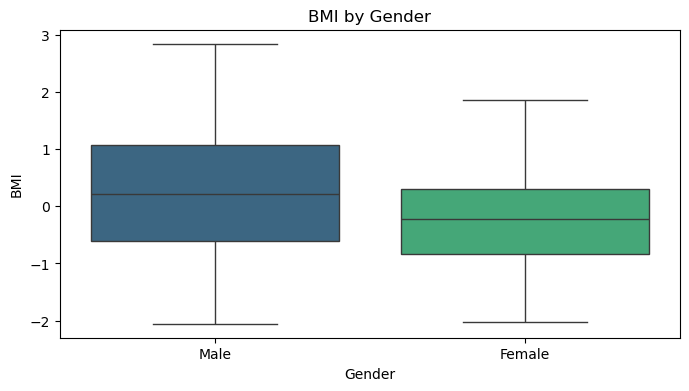

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


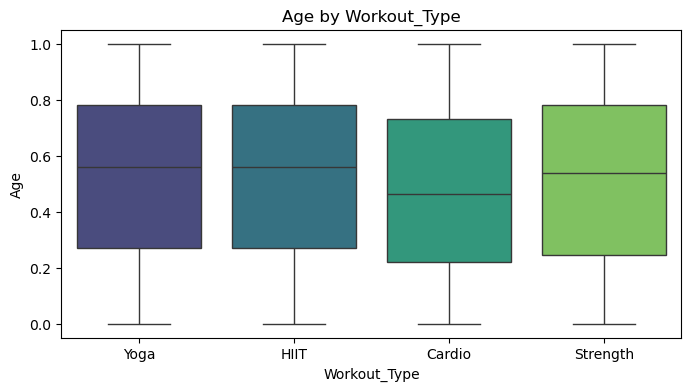

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


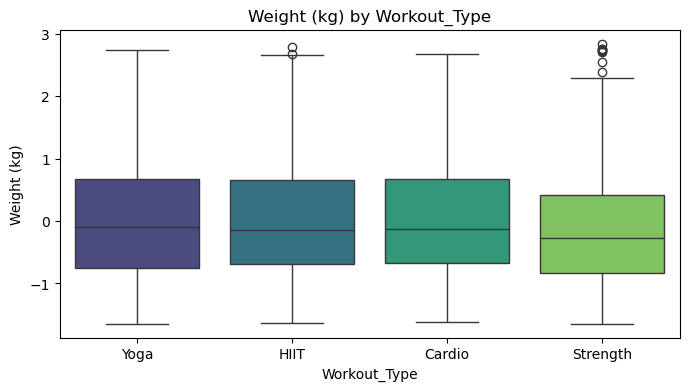

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


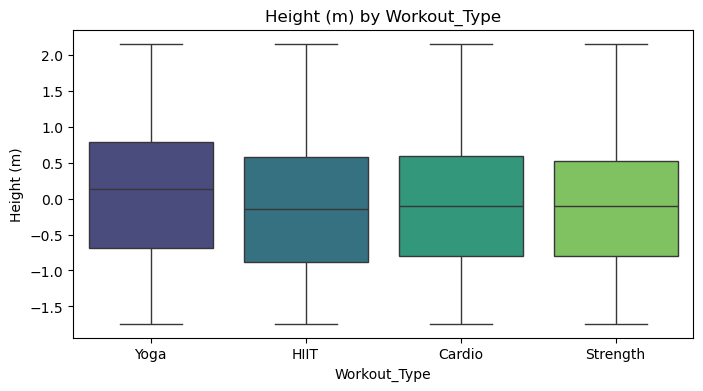

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


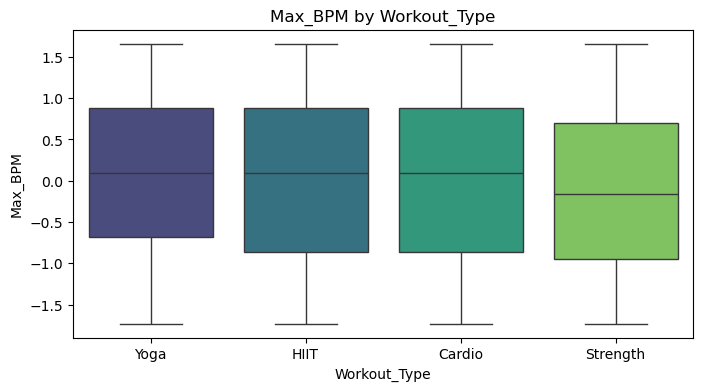

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


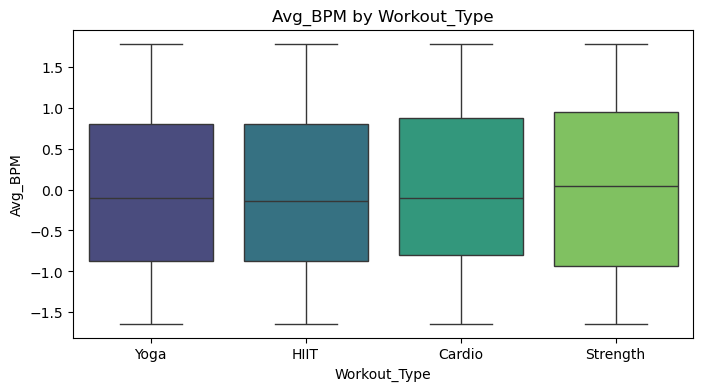

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


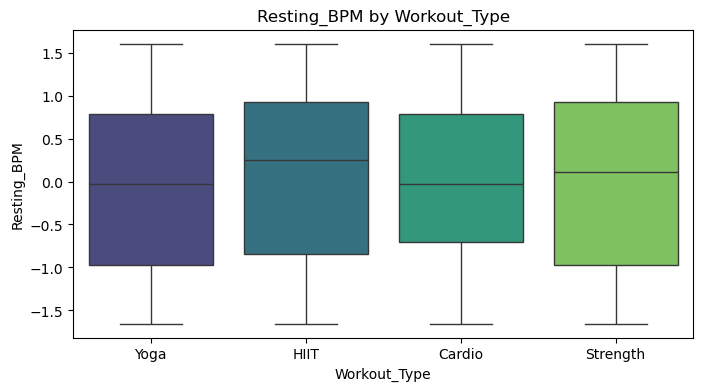

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


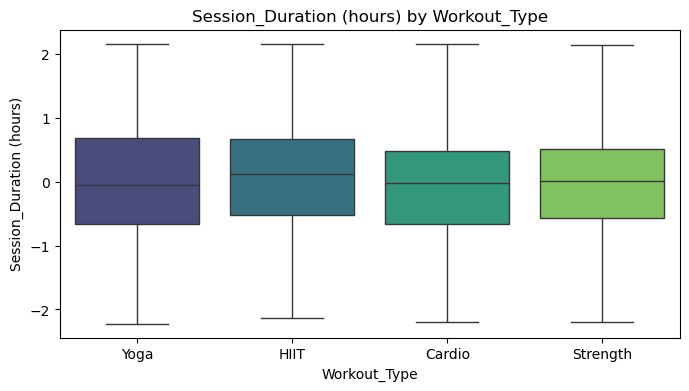

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


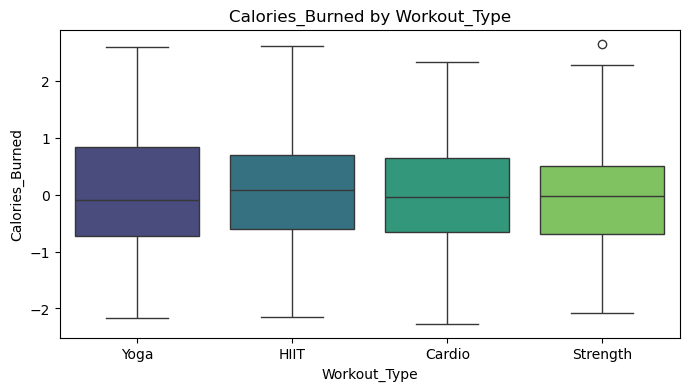

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


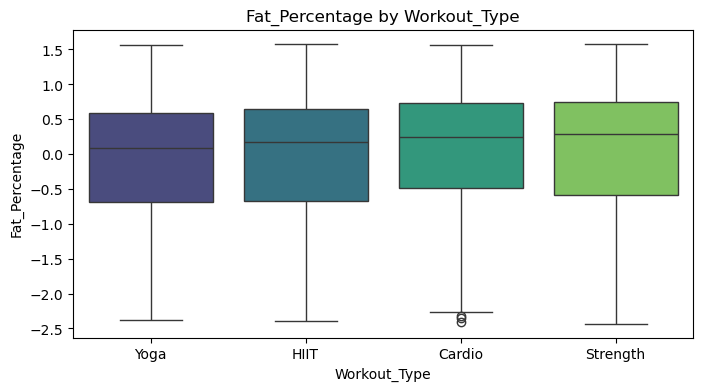

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


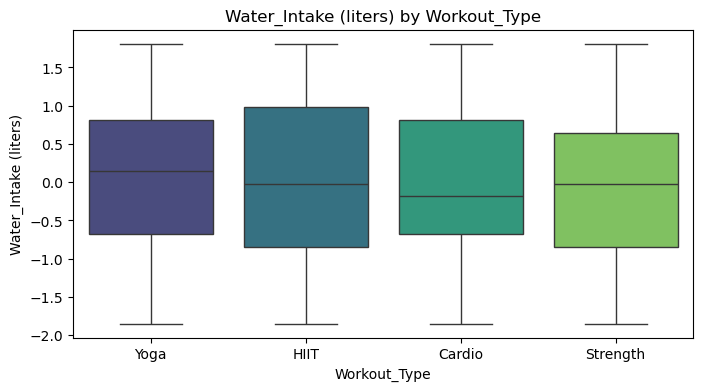

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


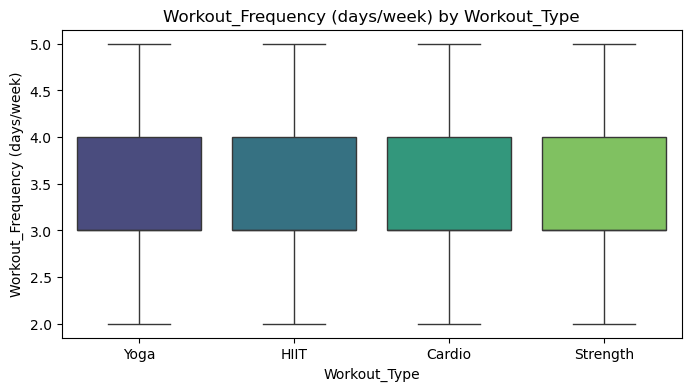

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


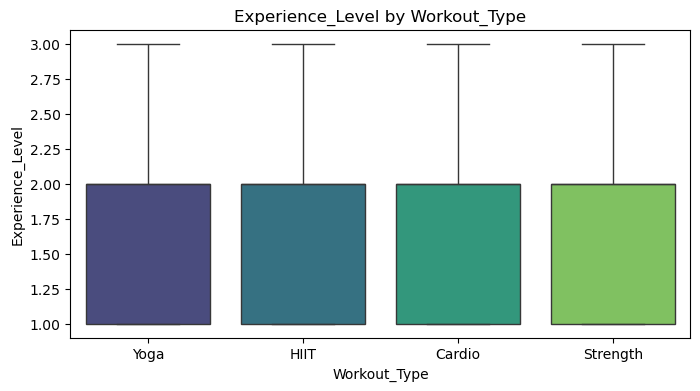

C:\Users\The0A\AppData\Local\Temp\ipykernel_29144\1132401784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")


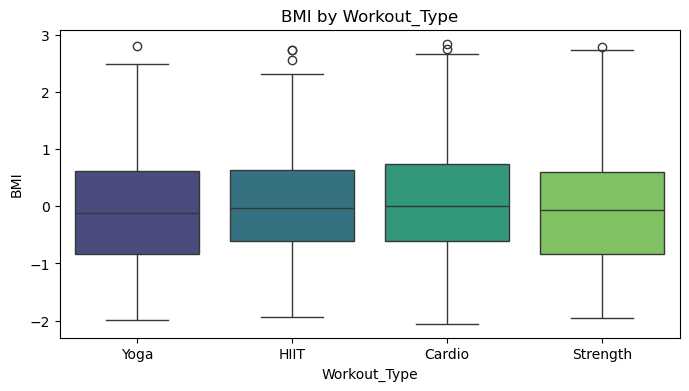

In [11]:
# iii. Prepare bivariate plots
plt.figure(figsize=(12, 10))
sns.pairplot(df[num_columns], corner=True, diag_kind='kde')  
plt.suptitle("Pairwise Relationships of Numerical Variables", y=1.02)
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns # Select columns with 'object' dtype  المفروض ان عرفنا هذا من البداية

# Boxplots for numerical variables grouped by categorical variables
for cat_col in categorical_columns:
    for num_col in num_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=cat_col, y=num_col, palette="viridis")
        plt.title(f"{num_col} by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

In [12]:
# iv. Portray advanced graphs

df = pd.get_dummies(df, columns=['Workout_Type'],drop_first=False) # keep all workout types
genderMapping = {'Male':False, 'Female':True}
df['Gender'] = df['Gender'].map(genderMapping)   # to reduce the number of columns while being clear
display(df)



Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  \
0    0.926829   False     0.832920   -0.103497  0.008689  0.948726   
1    0.682927    True     0.145693   -1.504463 -0.078296  0.528990   
2    0.341463    True    -0.203049   -0.492654 -1.122118 -1.499733   
3    0.170732   False    -0.967204   -0.181328  0.878541  1.438418   
4    0.487805   False    -1.331332    0.519155  0.704570  1.018682   
..        ...     ...          ...         ...       ...       ...   
968  0.146341   False     0.771377    0.129998  0.617585  1.018682   
969  0.170732   False    -0.279977   -0.881811  0.356630  1.578330   
970  1.000000    True    -0.597948    0.285661  1.226481 -1.639645   
971  0.341463   False     2.786900    0.830481  1.574422  0.179211   
972  0.682927   False     0.853434   -0.726148 -1.209103  0.179211   

     Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0      -0.295231                  1.282767         1.577783       -2.013600   
1       0.520780                  0.134331        -0.058795        1.407550   
2      -1.111242                 -0.425164        -0.842829        1.327241   
3      -0.839238                 -1.956413        -1.394698        0.588401   
4       0.792784                 -1.809178        -1.303355        0.652648   
..           ...                       ...              ...             ...   
968     0.656782                  0.929402         1.771888       -2.431205   
969    -0.839238                  0.369907         1.376065       -0.021945   
970    -1.247244                  1.371109         0.116281       -1.017772   
971    -0.023227                 -0.454611        -0.058795        0.492031   
972     0.520780                 -1.485259        -1.356639        0.588401   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                 1.479839                              4                 3   
1                -0.852191                              4                 2   
2                -0.519044                              4                 2   
3                -0.852191                              3                 1   
4                 0.313824                              3                 1   
..                     ...                            ...               ...   
968               1.479839                              4                 3   
969               0.646971                              2                 1   
970               0.147250                              5                 3   
971              -0.852191                              3                 2   
972               1.479839                              2                 1   

          BMI  Workout_Type_Cardio  Workout_Type_HIIT  Workout_Type_Strength  \
0    1.022724                False              False                  False   
1    1.332428                False               True                  False   
2    0.078125                 True              False                  False   
3   -1.005841                False              False                   True   
4   -1.697515                False              False                   True   
..        ...                  ...                ...                    ...   
968  0.776680                False              False                   True   
969  0.246742                False              False                   True   
970 -0.818298                 True              False                  False   
971  2.320041                False               True                  False   
972  1.569868                False              False                   True   

     Workout_Type_Yoga  
0                 True  
1                False  
2                False  
3                False  
4                False  
..                 ...  
968              False  
969              False  
970              False  
971              False  
972              False  

[931 rows

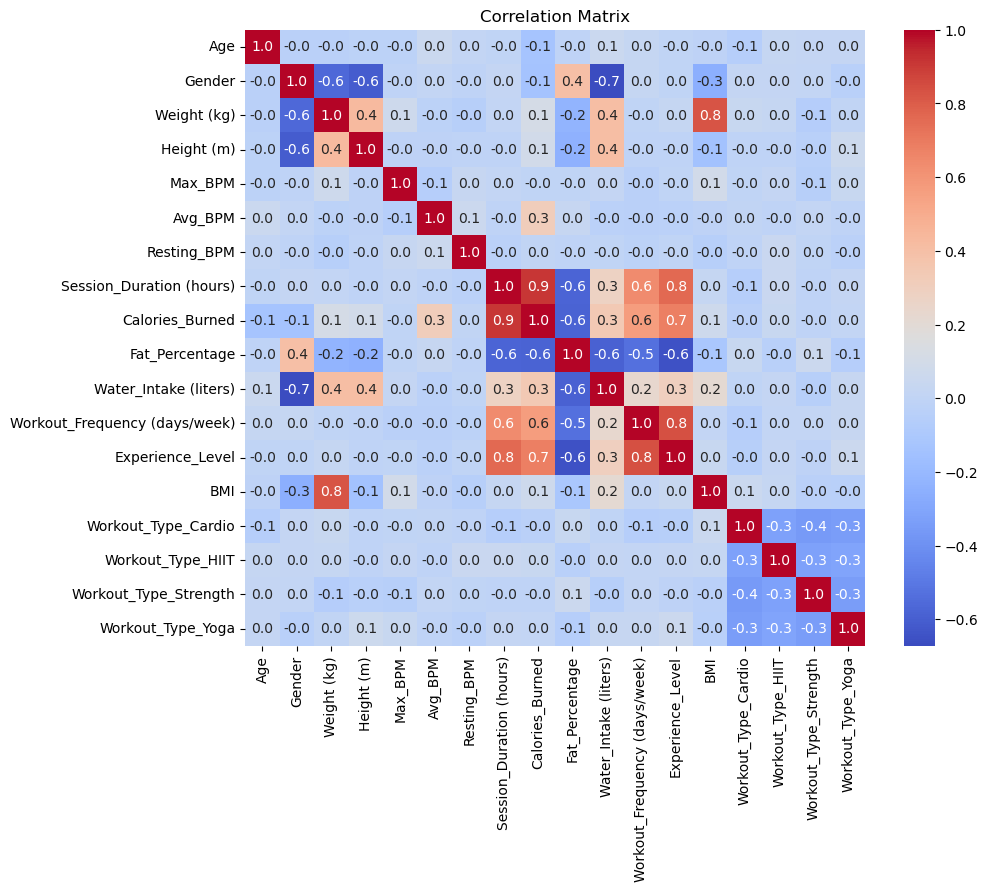

In [13]:
# display heat map again

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  \
0    0.926829   False     0.832920   -0.103497  0.008689  0.948726   
1    0.682927    True     0.145693   -1.504463 -0.078296  0.528990   
2    0.341463    True    -0.203049   -0.492654 -1.122118 -1.499733   
3    0.170732   False    -0.967204   -0.181328  0.878541  1.438418   
4    0.487805   False    -1.331332    0.519155  0.704570  1.018682   
..        ...     ...          ...         ...       ...       ...   
968  0.146341   False     0.771377    0.129998  0.617585  1.018682   
969  0.170732   False    -0.279977   -0.881811  0.356630  1.578330   
970  1.000000    True    -0.597948    0.285661  1.226481 -1.639645   
971  0.341463   False     2.786900    0.830481  1.574422  0.179211   
972  0.682927   False     0.853434   -0.726148 -1.209103  0.179211   

     Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0      -0.295231                  1.282767         1.577783       -2.013600   
1       0.520780                  0.134331        -0.058795        1.407550   
2      -1.111242                 -0.425164        -0.842829        1.327241   
3      -0.839238                 -1.956413        -1.394698        0.588401   
4       0.792784                 -1.809178        -1.303355        0.652648   
..           ...                       ...              ...             ...   
968     0.656782                  0.929402         1.771888       -2.431205   
969    -0.839238                  0.369907         1.376065       -0.021945   
970    -1.247244                  1.371109         0.116281       -1.017772   
971    -0.023227                 -0.454611        -0.058795        0.492031   
972     0.520780                 -1.485259        -1.356639        0.588401   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                 1.479839                              4                 3   
1                -0.852191                              4                 2   
2                -0.519044                              4                 2   
3                -0.852191                              3                 1   
4                 0.313824                              3                 1   
..                     ...                            ...               ...   
968               1.479839                              4                 3   
969               0.646971                              2                 1   
970               0.147250                              5                 3   
971              -0.852191                              3                 2   
972               1.479839                              2                 1   

          BMI  Workout_Type_Cardio  Workout_Type_HIIT  Workout_Type_Strength  \
0    1.022724                False              False                  False   
1    1.332428                False               True                  False   
2    0.078125                 True              False                  False   
3   -1.005841                False              False                   True   
4   -1.697515                False              False                   True   
..        ...                  ...                ...                    ...   
968  0.776680                False              False                   True   
969  0.246742                False              False                   True   
970 -0.818298                 True              False                  False   
971  2.320041                False               True                  False   
972  1.569868                False              False                   True   

     Workout_Type_Yoga  
0                 True  
1                False  
2                False  
3                False  
4                False  
..                 ...  
968              False  
969              False  
970              False  
971              False  
972              False  

[931 rows

The variance captured by pca 1 is:  26.54%
The variance captured by pca 2 is:  16.78%
The variance captured by pca 3 is:  11.23%
The variance captured by pca 4 is:  9.85%
The variance captured by pca 5 is:  8.98%


field   coeff
9           Water_Intake (liters)  0.4325
7                 Calories_Burned  0.4072
2                     Weight (kg)  0.3256
10  Workout_Frequency (days/week)  0.3137
11               Experience_Level  0.2875
3                      Height (m)  0.2367
12                            BMI  0.2164
5                         Avg_BPM  0.0347
4                         Max_BPM  0.0182
16              Workout_Type_Yoga  0.0118
14              Workout_Type_HIIT  0.0084
0                             Age -0.0035
13            Workout_Type_Cardio -0.0061
6                     Resting_BPM -0.0141
15          Workout_Type_Strength -0.0141
1                          Gender -0.1646
8                  Fat_Percentage -0.4773

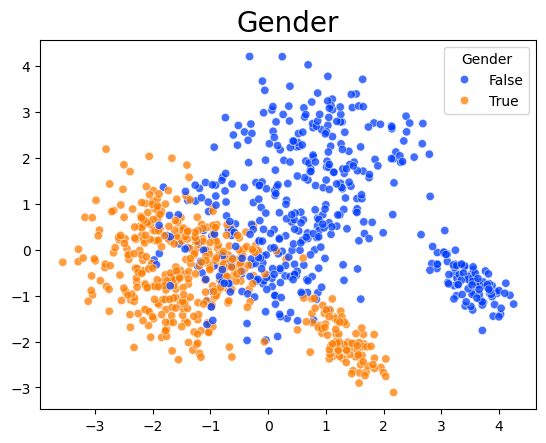

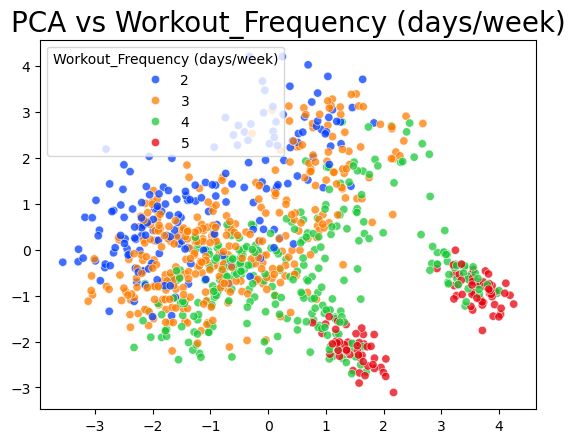

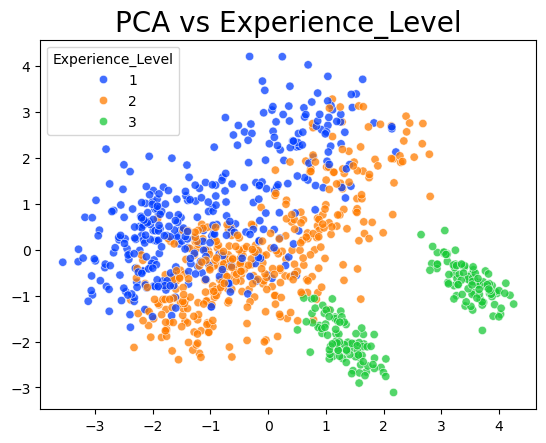

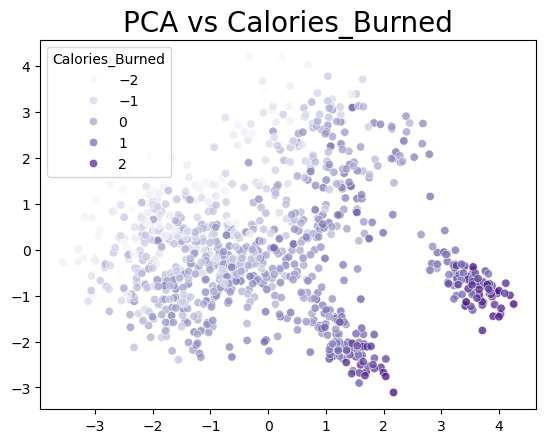

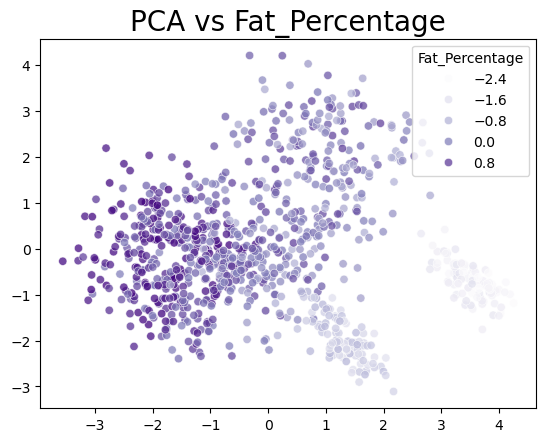

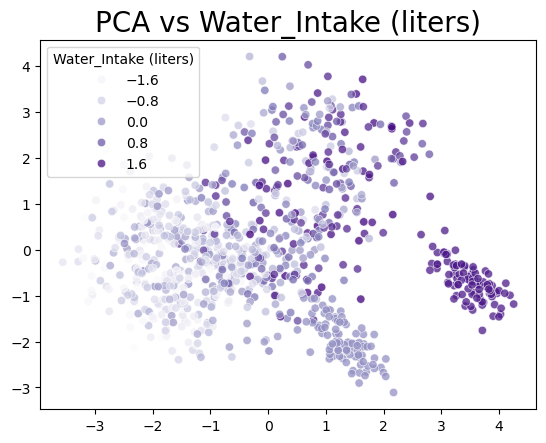

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA


# pca plot ---------------------------------------

num_columns = df.select_dtypes(exclude='object').columns
# num_columns.drop(['pca1'])
# num_columns.drop(['pca2'])
pca_input_columns=num_columns.drop(['Session_Duration (hours)'])
pca = PCA(n_components=5) #<<<--------- components
principalComponents = pca.fit_transform(df[pca_input_columns])
#df['pca1'] = principalComponents[:,0]
#df['pca2'] = principalComponents[:,1]

display(df)
for ind,var in enumerate(pca.explained_variance_ratio_): # explains and prints the variance of every component
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

display(ndf.sort_values(by=['coeff'], ascending=False))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ discreet

plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Gender', palette='bright',
            alpha=0.75,
            data=df)
plt.title('Gender', fontsize = 20)
plt.show()
plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Workout_Frequency (days/week)', palette="bright",
            alpha=0.75,
            data=df)
plt.title('PCA vs Workout_Frequency (days/week)', fontsize = 20)
plt.show()
plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Experience_Level', palette="bright",
            alpha=0.75,
            data=df)
plt.title('PCA vs Experience_Level', fontsize = 20)
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ non-discreet

plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Calories_Burned', palette="Purples",
            alpha=0.75,
            data=df)
plt.title('PCA vs Calories_Burned', fontsize = 20)
plt.show()
plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Fat_Percentage', palette="Purples",
            alpha=0.75,
            data=df)
plt.title('PCA vs Fat_Percentage', fontsize = 20)
plt.show()
plt.figure()
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],
            hue='Water_Intake (liters)', palette="Purples",
            alpha=0.75,
            data=df)
plt.title('PCA vs Water_Intake (liters)', fontsize = 20)
plt.show()




# highest coeffs in order:
# Water_Intake (liters)	0.4325
# Calories_Burned	0.4072
# Weight (kg)	0.3256
# Workout_Frequency (days/week)	0.3137
# Experience_Level	0.2875
# Height (m)	0.2367
# BMI	0.2164
# Gender	-0.1646
# Fat_Percentage -0.4773


FeedBack

the target variable is fine
regression problem
feature  and build a model